In [57]:
# https://www.visualcrossing.com/weather/weather-data-services

# https://drive.google.com/drive/folders/1gjGJWesSj3cZ_bFQlKTlD_CiCPSLbm6q


**Sorting and cleaning the onion yield data**

In [98]:
import pandas as pd
import numpy as np

# Sample DataFrame
data = pd.read_csv('/Users/jonotapia/Desktop/Onion-project/Data/onion_yield (1).csv')

df = pd.DataFrame(data)

# Assuming you have a DataFrame 'df'
# Convert the 'Year' column to a numeric type
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Filter the DataFrame to keep only rows where 'Year' is between 1982 and 2021
df = df[(df['Year'] >= 1982) & (df['Year'] <= 2021)]

# Group by 'Area' and check if each group has entries for all years 1982 to 2021
def has_required_years(group):
    return all(year in group['Year'].values for year in range(1982, 2022))

filtered_df = df.groupby('Area').filter(has_required_years)

# Now, 'filtered_df' contains only the rows where each country has entries for the years 1982 to 2021.


# Filter rows by 'Element' to keep only 'Yield'
filtered_df = df[df['Element'] == 'Yield']

# Sort by 'Area' in alphabetical order and 'Year' in ascending order
sorted_df = filtered_df.sort_values(by=['Area', 'Year'], ascending=[True, True])

# Group by 'Area' (country)
grouped = sorted_df.groupby('Area')

# Initialize an empty DataFrame for the final result
final_df = pd.DataFrame(columns=['Area', 'Year', 'Value'])

# Loop through each group (country) and append to the final DataFrame
for group_name, group_data in grouped:
    final_df = final_df.append(group_data)

/var/folders/3j/jblwcqtn7xl0w9bhv7hkxjvr0000gn/T/ipykernel_22332/487268258.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(group_data)
/var/folders/3j/jblwcqtn7xl0w9bhv7hkxjvr0000gn/T/ipykernel_22332/487268258.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(group_data)
/var/folders/3j/jblwcqtn7xl0w9bhv7hkxjvr0000gn/T/ipykernel_22332/487268258.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(group_data)
/var/folders/3j/jblwcqtn7xl0w9bhv7hkxjvr0000gn/T/ipykernel_22332/487268258.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = fina

**Sorting and cleaning the weather data**

In [100]:
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame
weatherdata = pd.read_csv('/Users/jonotapia/Desktop/Onion-project/Data/weatherdata.csv')

# Remove the 'uvindex' column
weatherdata = weatherdata.drop('uvindex', axis=1)

# Replace all null values with NaN (Not a Number)
# weatherdata = weatherdata.fillna(value=np.nan)

# Remove rows with null values except for zeros
weatherdata = weatherdata.dropna(subset=weatherdata.columns, how='any')

# Extract the year from the 'datetime' column and rename it to 'Year'
weatherdata['Year'] = weatherdata['datetime'].astype(str).str.extract(r'(\d{4})')

# Drop the original 'datetime' column
weatherdata = weatherdata.drop('datetime', axis=1)

# Reset the index
weatherdata = weatherdata.reset_index(drop=True)

# Now, the 'weatherdata' DataFrame has the 'uvindex' column removed, null values removed (except for zeros), and 'Year' column extracted from 'datetime'.

# Sort by 'name' in alphabetical order and 'Year' in ascending order
weatherdata = weatherdata.sort_values(by=['name', 'Year'])


# Assuming you have a DataFrame 'weatherdata' with a 'name' column, a 'Year' column, and other relevant columns
# Group the data by 'name' (country) and 'Year', then calculate the average for each group
average_by_country_and_year = weatherdata.groupby(['name', 'Year']).mean().reset_index()

# 'average_by_country_and_year' now contains the average values for each country and year


In [102]:
import pandas as pd

# Sample DataFrames: final_df and average_by_country_and_year

# Clean and preprocess 'final_df'
final_df['Area'] = final_df['Area'].str.strip()  # Remove leading/trailing white spaces
final_df['Year'] = pd.to_numeric(final_df['Year'], errors='coerce')  # Ensure 'Year' is numeric

# Clean and preprocess 'average_by_country_and_year'
average_by_country_and_year['name'] = average_by_country_and_year['name'].str.strip()  # Remove leading/trailing white spaces
average_by_country_and_year['Year'] = pd.to_numeric(average_by_country_and_year['Year'], errors='coerce')  # Ensure 'Year' is numeric

# Merge the DataFrames based on both 'Area' and 'Year' in 'final_df', and 'name' and 'Year' in 'average_by_country_and_year'
merged_data = pd.merge(final_df, average_by_country_and_year, left_on=['Area', 'Year'], right_on=['name', 'Year'], how='inner')

# Now, 'merged_data' contains only the combined data entries that match both country and year


In [103]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Assuming you have the 'concatenated_data' dataframe that combines the onion yield and weather data

# Get the list of weather columns
weather_columns = ['temp', 'dew', 'humidity', 'precip', 'windspeed', 'cloudcover']

# Initialize an empty dictionary to store models and results
weather_models = {}

# Create an imputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Define your target variable (y) which is 'Value' from the dataset
y = merged_data['Value']  # Assuming 'Value' is your target variable

# Impute missing values in y
y = imputer.fit_transform(y.values.reshape(-1, 1))

# Iterate through each weather column
for column in weather_columns:
    # Define your features (X) which is the current weather column
    X = merged_data[[column]]

    # Impute missing values in X
    X = imputer.fit_transform(X)

    # Initialize a Linear Regression model
    model = LinearRegression()

    # Fit the model
    model.fit(X, y)

    # Make predictions
    y_pred = model.predict(X)

    # Evaluate the model
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    # Store the model and results in the dictionary
    weather_models[column] = {
        'model': model,
        'mse': mse,
        'r2': r2
    }

# Print the results for each weather column
for column, model_info in weather_models.items():
    print(f"Column: {column}")
    print(f"Mean Squared Error: {model_info['mse']}")
    print(f"R-squared: {model_info['r2']}")
    print("\n")



Column: temp
Mean Squared Error: 8893163099.753252
R-squared: 0.1057345943340009


Column: dew
Mean Squared Error: 8703088103.802843
R-squared: 0.12484787174204404


Column: humidity
Mean Squared Error: 9898356902.2061
R-squared: 0.0046558180380410485


Column: precip
Mean Squared Error: 9533789557.926956
R-squared: 0.041315436260202176


Column: windspeed
Mean Squared Error: 9940509758.880186
R-squared: 0.0004170740668799633


Column: cloudcover
Mean Squared Error: 9933704750.214808
R-squared: 0.0011013619593255308




In [104]:
unique_names = merged_data['name'].unique().tolist()

In [63]:
 pip install scikit-learn matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


Merging the data and creating a linear regression model

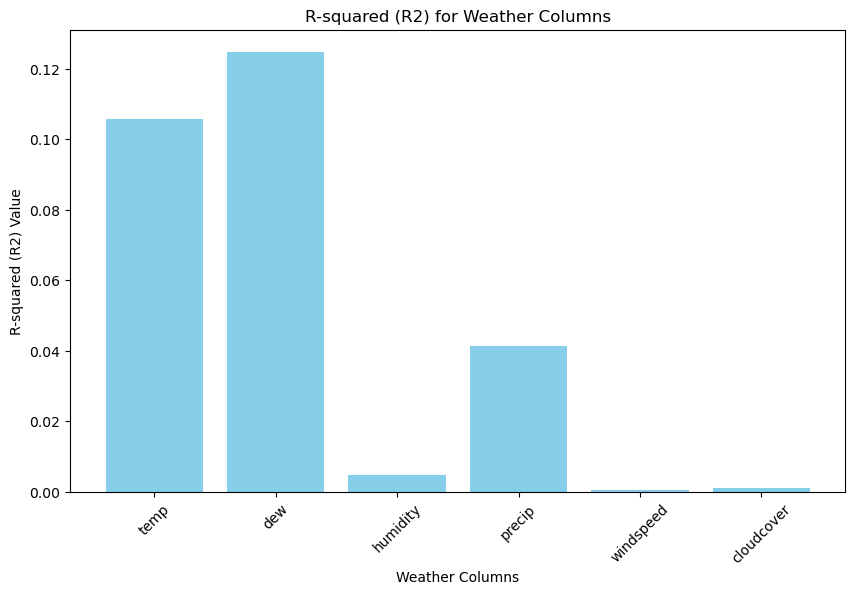

In [69]:
import matplotlib.pyplot as plt

# Assuming you have the 'weather_models' dictionary with R-squared values

# Extract the weather columns and R-squared values
weather_columns = list(weather_models.keys())
r2_values = [model_info['r2'] for model_info in weather_models.values()]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(weather_columns, r2_values, color='skyblue')
plt.xlabel('Weather Columns')
plt.ylabel('R-squared (R2) Value')
plt.title('R-squared (R2) for Weather Columns')
plt.xticks(rotation=45)
plt.show()


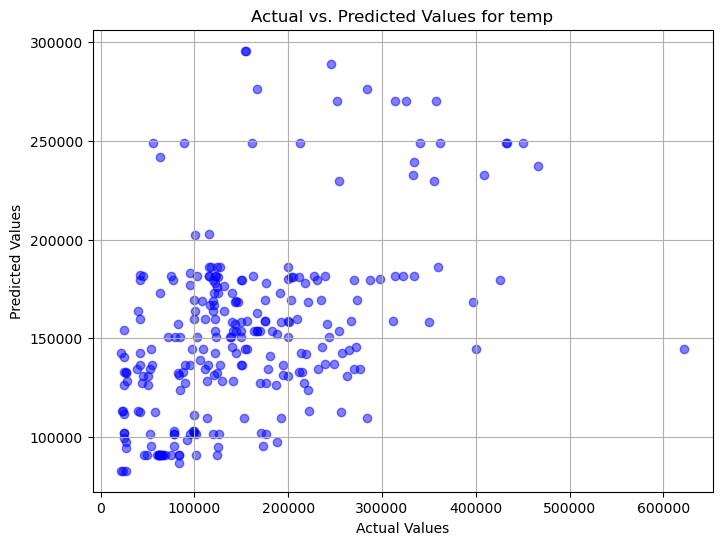

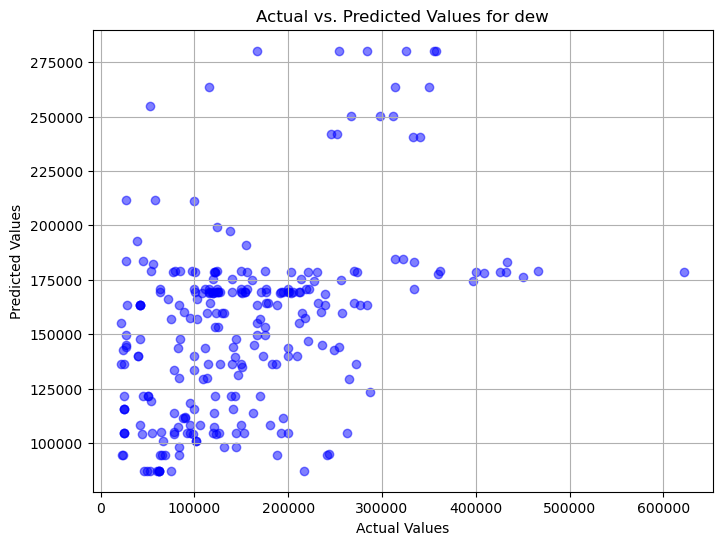

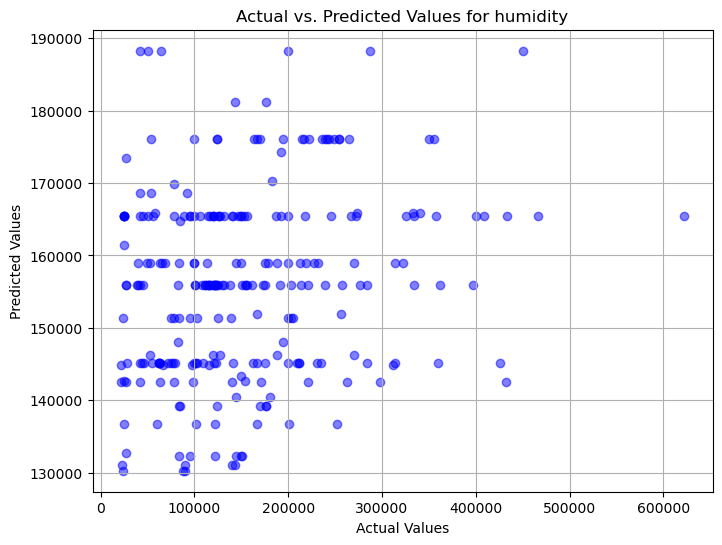

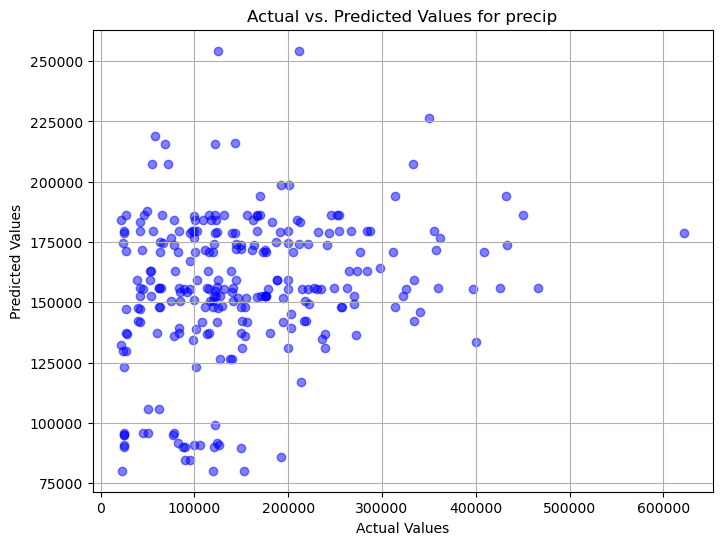

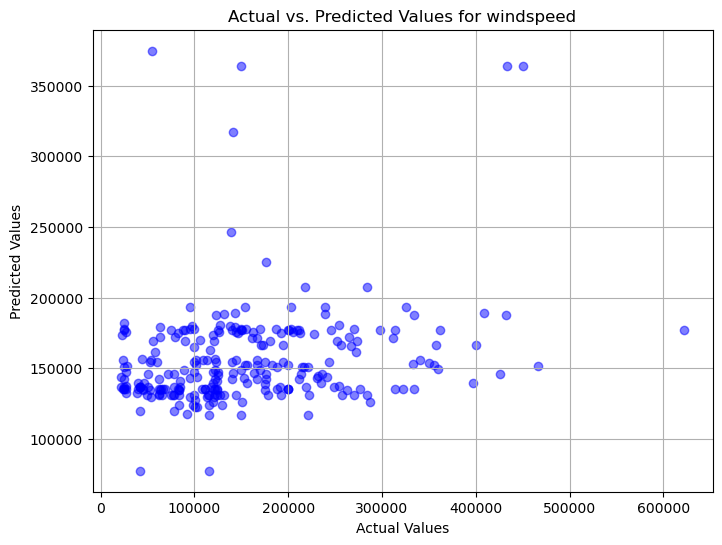

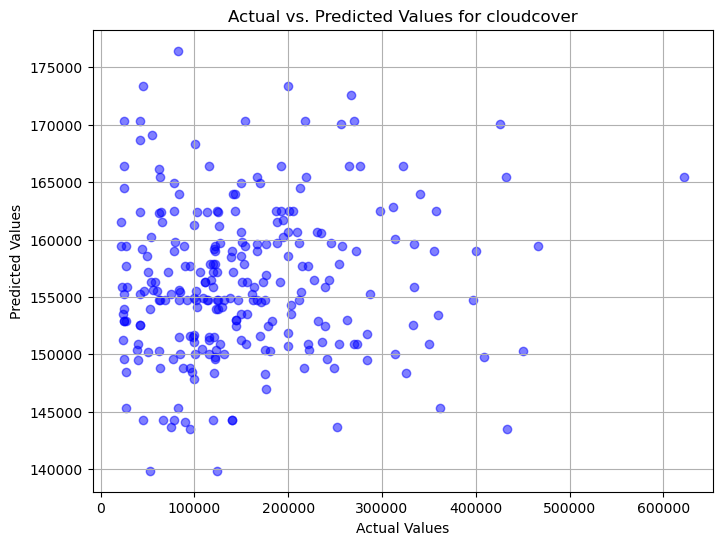

Column: temp
R-squared (R2): 0.2401725195878447
Mean Squared Error (MSE): 7526750168.187533


Column: dew
R-squared (R2): 0.2006147327633
Mean Squared Error (MSE): 7918604353.920937


Column: humidity
R-squared (R2): 0.0356686257229053
Mean Squared Error (MSE): 9552538596.776611


Column: precip
R-squared (R2): 0.03933047664431322
Mean Squared Error (MSE): 9516264787.590828


Column: windspeed
R-squared (R2): 0.05752840232439771
Mean Squared Error (MSE): 9335998551.235516


Column: cloudcover
R-squared (R2): 0.007130362764316223
Mean Squared Error (MSE): 9835234841.727934




In [110]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Assuming you have the 'concatenated_data' dataframe

# Define your target variable (y)
y = merged_data['Value']  # Assuming 'Value' is your target variable

# Initialize an empty dictionary to store models and results
weather_models = {}

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [5, 10, 15],
    'n_estimators': [200, 400, 600]
}

# Iterate through each weather column
for column in weather_columns:
    # Define your features (X) which is the current weather column
    X = merged_data[[column]]

    # Split the data into training and testing sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the XGBoost Regressor model
    xgb_model = xgb.XGBRegressor()

    # Perform Grid Search for hyperparameter tuning
    grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Fit the best model on the training data
    best_model.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = best_model.predict(X_val)

    # Evaluate the model
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    # Store the model and results in the dictionary
    weather_models[column] = {
        'model': best_model,
        'mse': mse,
        'r2': r2
    }

    # Scatter plot for actual vs. predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_val, y_pred, c='b', marker='o', alpha=0.5)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Actual vs. Predicted Values for {column}")
    plt.grid(True)
    plt.show()

# Print the evaluation metrics for each weather column
for column, model_info in weather_models.items():
    print(f"Column: {column}")
    print(f"R-squared (R2): {model_info['r2']}")
    print(f"Mean Squared Error (MSE): {model_info['mse']}")
    print("\n")
 



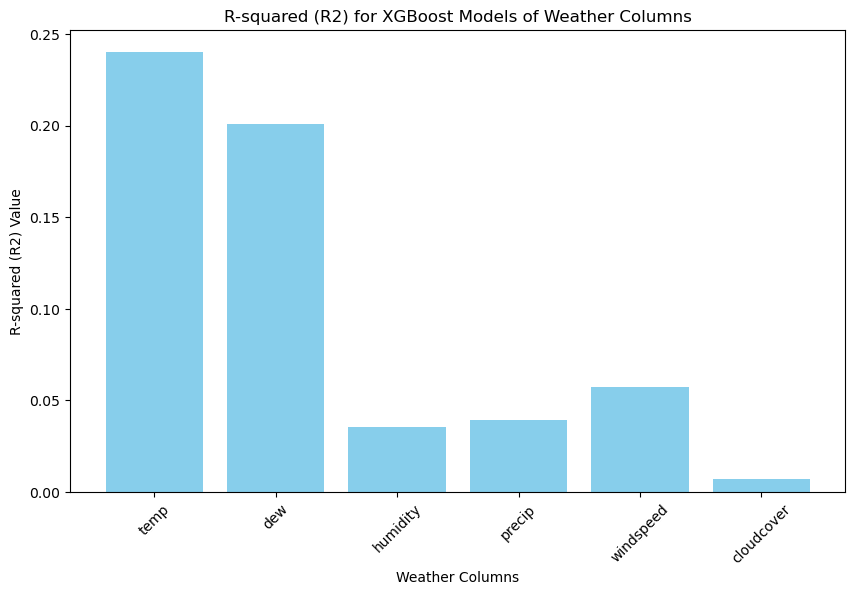

In [111]:
import matplotlib.pyplot as plt

# Assuming you have a dictionary 'weather_models' containing the XGBoost models and their R-squared values

# Extract the weather columns and R-squared values
weather_columns = list(weather_models.keys())
r2_values = [model_info['r2'] for model_info in weather_models.values()]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(weather_columns, r2_values, color='skyblue')
plt.xlabel('Weather Columns')
plt.ylabel('R-squared (R2) Value')
plt.title('R-squared (R2) for XGBoost Models of Weather Columns')
plt.xticks(rotation=45)
plt.show()


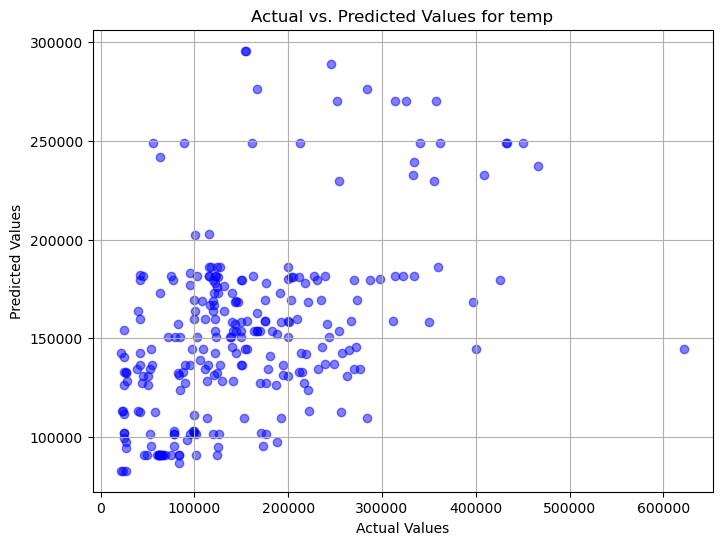

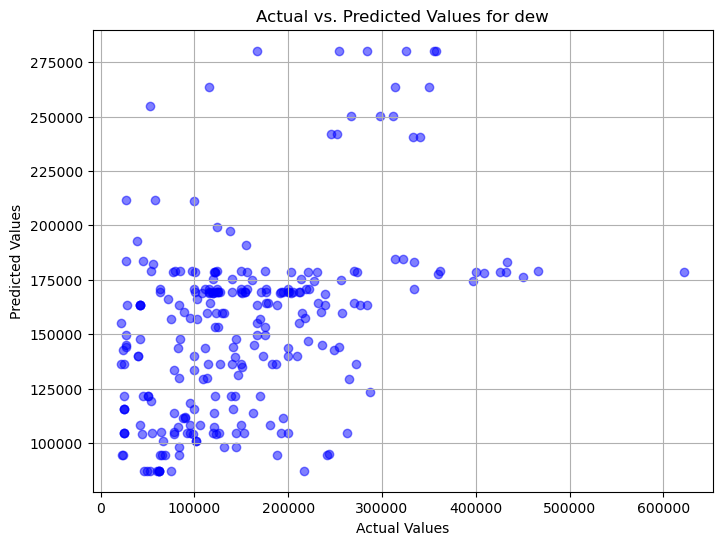

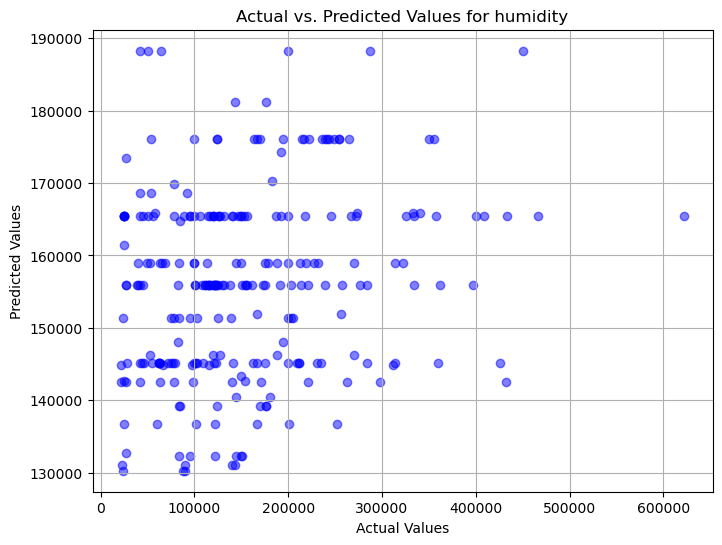

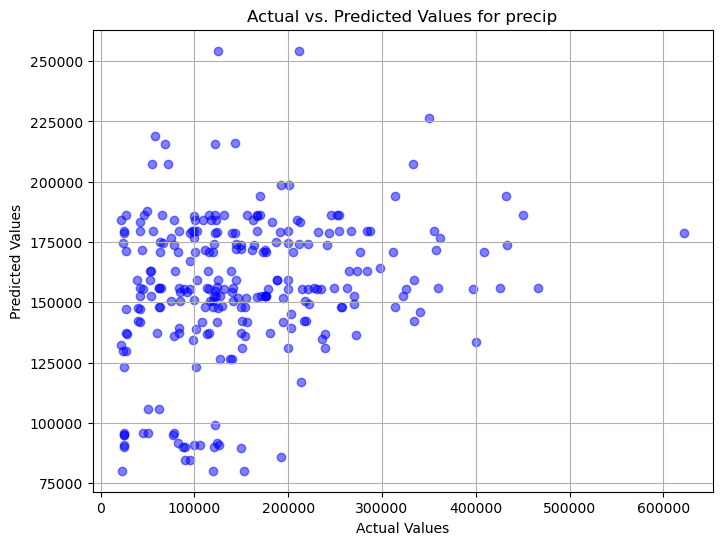

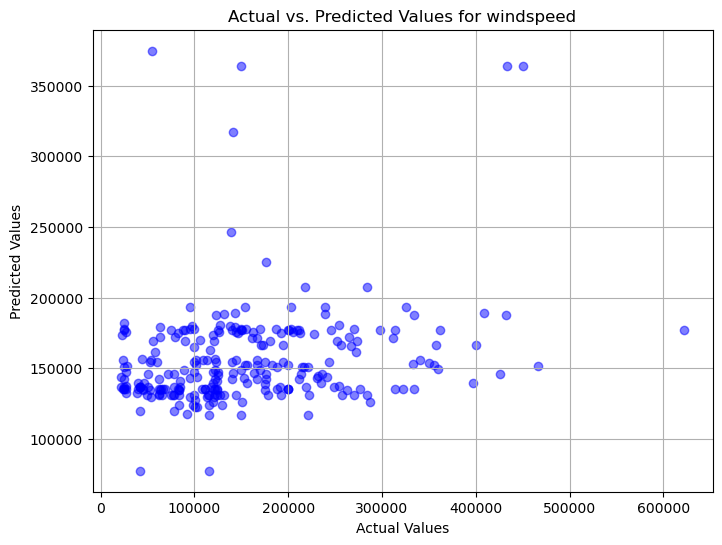

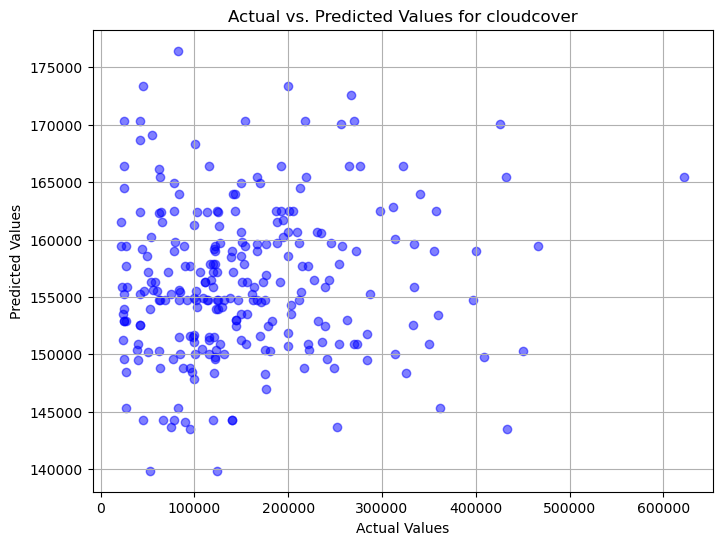

Column: temp
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
R-squared (R2): 0.2401725195878447
Mean Squared Error (MSE): 7526750168.187533


Column: dew
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
R-squared (R2): 0.2006147327633
Mean Squared Error (MSE): 7918604353.920937


Column: humidity
Best Hyperparameters: {'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 600}
R-squared (R2): 0.0356686257229053
Mean Squared Error (MSE): 9552538596.776611


Column: precip
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
R-squared (R2): 0.03933047664431322
Mean Squared Error (MSE): 9516264787.590828


Column: windspeed
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
R-squared (R2): 0.05752840232439771
Mean Squared Error (MSE): 9335998551.235516


Column: cloudcover
Best Hyperparameters: {'learning_rate': 0.001, 'max_depth': 10, 'n_estimators': 200}
R

In [160]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Assuming you have the 'concatenated_data' dataframe

# Define your target variable (y)
y = merged_data['Value']  # Assuming 'Value' is your target variable

# Initialize an empty dictionary to store models and results
weather_models = {}

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [5, 10, 15],
    'n_estimators': [200, 400, 600]
}

# Iterate through each weather column
for column in weather_columns:
    # Define your features (X) which is the current weather column
    X = merged_data[[column]]

    # Split the data into training and testing sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the XGBoost Regressor model
    xgb_model = xgb.XGBRegressor()

    # Perform Grid Search for hyperparameter tuning
    grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_  # Get the best hyperparameters
    best_model = grid_search.best_estimator_

    # Fit the best model on the training data
    best_model.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = best_model.predict(X_val)

    # Evaluate the model
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    # Store the model and results in the dictionary
    weather_models[column] = {
        'model': best_model,
        'mse': mse,
        'r2': r2,
        'best_params': best_params  # Store best hyperparameters
    }

    # Scatter plot for actual vs. predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_val, y_pred, c='b', marker='o', alpha=0.5)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Actual vs. Predicted Values for {column}")
    plt.grid(True)
    plt.show()

# Print the evaluation metrics and best hyperparameters for each weather column
for column, model_info in weather_models.items():
    print(f"Column: {column}")
    print(f"Best Hyperparameters: {model_info['best_params']}")
    print(f"R-squared (R2): {model_info['r2']}")
    print(f"Mean Squared Error (MSE): {model_info['mse']}")
    print("\n")


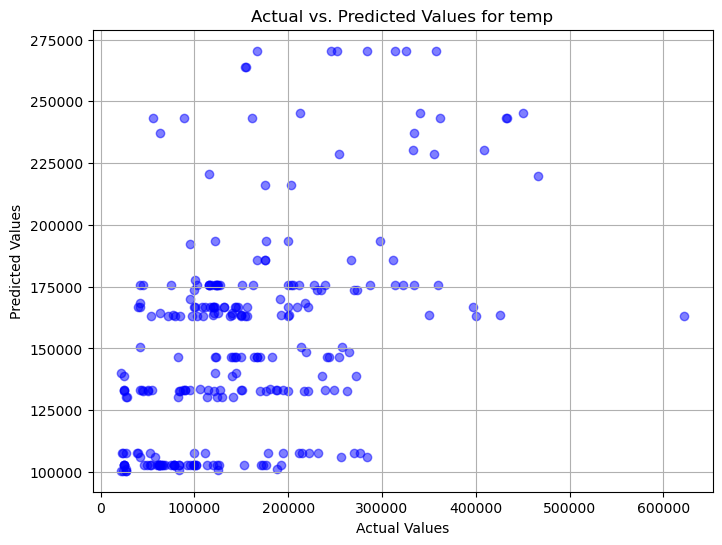

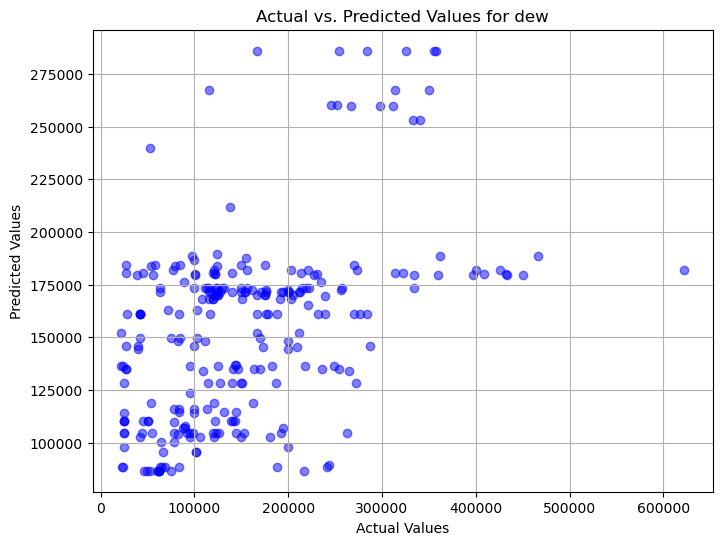

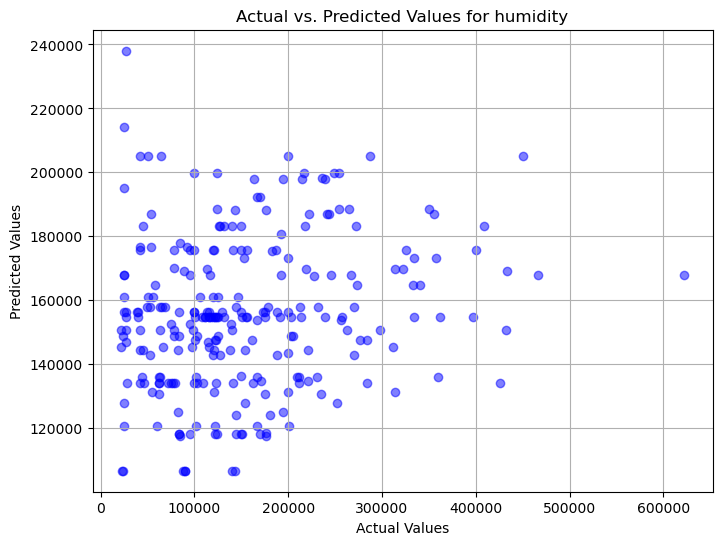

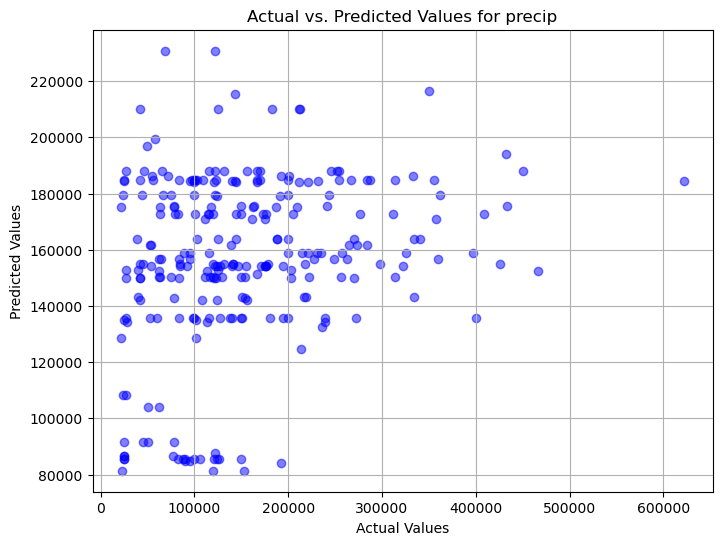

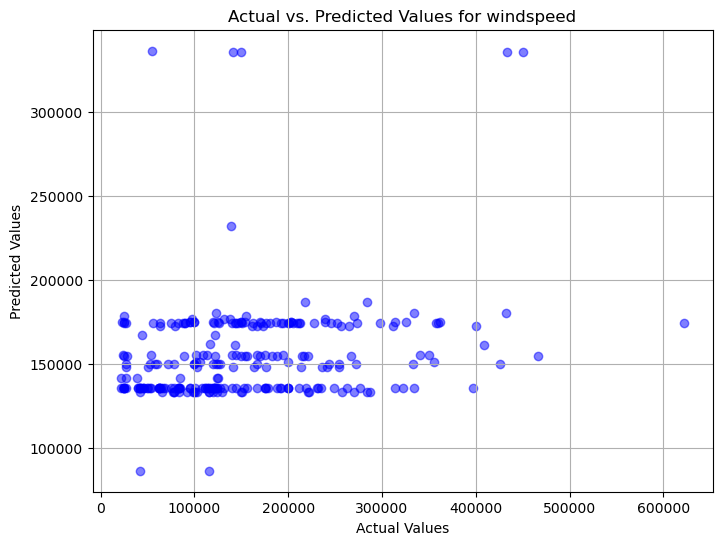

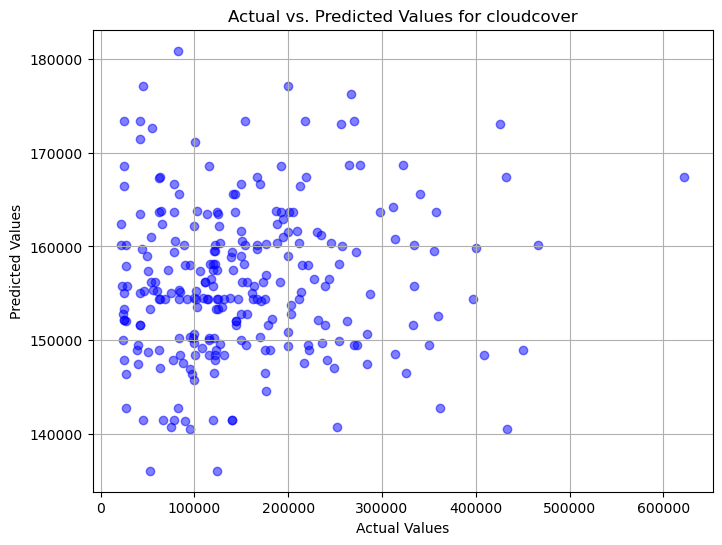

Column: temp
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
R-squared (R2): 0.23663278513320118
Mean Squared Error (MSE): 7561814307.862208


Column: dew
Best Hyperparameters: {'learning_rate': 0.02, 'max_depth': 3, 'n_estimators': 200}
R-squared (R2): 0.22739704068856914
Mean Squared Error (MSE): 7653302366.459751


Column: humidity
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
R-squared (R2): 0.030693404543712388
Mean Squared Error (MSE): 9601822477.410868


Column: precip
Best Hyperparameters: {'learning_rate': 0.02, 'max_depth': 3, 'n_estimators': 150}
R-squared (R2): 0.05195906959490726
Mean Squared Error (MSE): 9391167622.02991


Column: windspeed
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 150}
R-squared (R2): 0.057382633148322815
Mean Squared Error (MSE): 9337442521.345602


Column: cloudcover
Best Hyperparameters: {'learning_rate': 0.001, 'max_depth': 10, 'n_estimators': 

In [161]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Assuming you have the 'concatenated_data' dataframe

# Define your target variable (y)
y = merged_data['Value']  # Assuming 'Value' is your target variable

# Initialize an empty dictionary to store models and results
weather_models = {}

# Define customized parameter grids for each weather column
parameter_grids = {
    'temp': {
        'learning_rate': [0.1, 0.01, 0.001],
        'max_depth': [3, 5, 7],
        'n_estimators': [150, 200, 250]
    },
    'dew': {
        'learning_rate': [0.05, 0.02, 0.001],
        'max_depth': [3, 5, 7],
        'n_estimators': [150, 200, 250]
    },
    'humidity': {
        'learning_rate': [0.1, 0.01, 0.001],
        'max_depth': [3, 5, 7],
        'n_estimators': [500, 600, 700]
    },
    'precip': {
        'learning_rate': [0.05, 0.02, 0.001],
        'max_depth': [3, 5, 7],
        'n_estimators': [150, 200, 250]
    },
    'windspeed': {
        'learning_rate': [0.1, 0.01, 0.001],
        'max_depth': [3, 5, 7],
        'n_estimators': [150, 200, 250]
    },
    'cloudcover': {
        'learning_rate': [0.05, 0.02, 0.001],
        'max_depth': [8, 10, 12],
        'n_estimators': [150, 200, 250]
    }
}

# Iterate through each weather column
for column in parameter_grids:
    # Define your features (X) which is the current weather column
    X = merged_data[[column]]

    # Split the data into training and testing sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the XGBoost Regressor model
    xgb_model = xgb.XGBRegressor()

    # Perform Grid Search for hyperparameter tuning using the specific parameter grid
    grid_search = GridSearchCV(xgb_model, parameter_grids[column], scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_  # Get the best hyperparameters
    best_model = grid_search.best_estimator_

    # Fit the best model on the training data
    best_model.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = best_model.predict(X_val)

    # Evaluate the model
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    # Store the model and results in the dictionary
    weather_models[column] = {
        'model': best_model,
        'mse': mse,
        'r2': r2,
        'best_params': best_params  # Store best hyperparameters
    }

    # Scatter plot for actual vs. predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_val, y_pred, c='b', marker='o', alpha=0.5)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Actual vs. Predicted Values for {column}")
    plt.grid(True)
    plt.show()

# Print the evaluation metrics and best hyperparameters for each weather column
for column, model_info in weather_models.items():
    print(f"Column: {column}")
    print(f"Best Hyperparameters: {model_info['best_params']}")
    print(f"R-squared (R2): {model_info['r2']}")
    print(f"Mean Squared Error (MSE): {model_info['mse']}")
    print("\n")


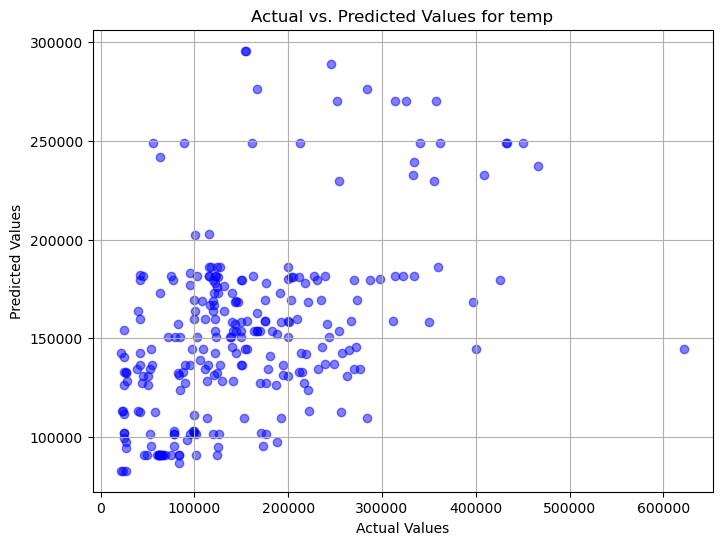

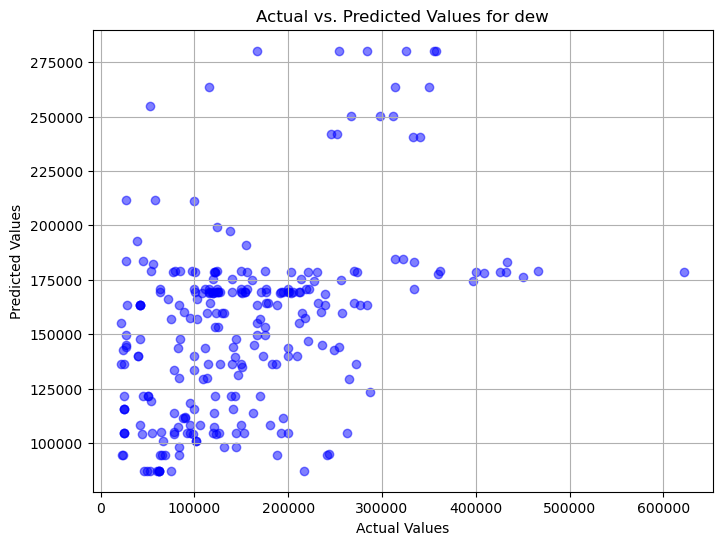

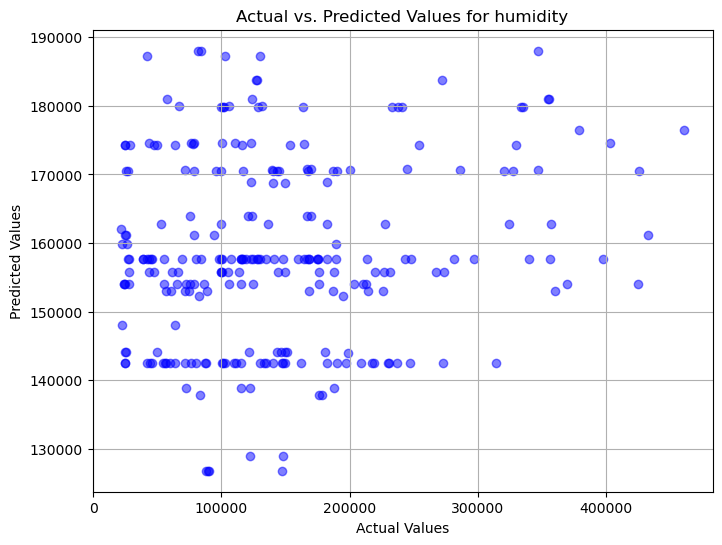

Skipping precip due to shape mismatch.
Skipping windspeed due to shape mismatch.
Skipping cloudcover due to shape mismatch.
Column: temp
R-squared (R2): 0.2401725195878447
Mean Squared Error (MSE): 7526750168.187533


Column: dew
R-squared (R2): 0.2006147327633
Mean Squared Error (MSE): 7918604353.920937


Column: humidity
R-squared (R2): 0.0015241848568815497
Mean Squared Error (MSE): 8842874791.539412




In [159]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Assuming you have the 'concatenated_data' dataframe

# Define your target variable (y)
y = merged_data['Value']  # Assuming 'Value' is your target variable

# Initialize an empty dictionary to store models and results
weather_models = {}

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [5, 10, 15],
    'n_estimators': [200, 400, 600]
}

# Iterate through each weather column
for column in weather_columns:
    # Define your features (X) which is the current weather column
    X = merged_data[[column]]

    # Calculate Z-scores for the current feature
    z_scores = np.abs(stats.zscore(X))

    # Set a threshold for Z-scores (e.g., 3)
    threshold = 3

    # Filter out rows with Z-scores greater than the threshold
    filtered_indices = (z_scores <= threshold).all(axis=1)
    X = X[filtered_indices]
    y = y[filtered_indices]

    # Check if X and y have the same number of rows
    if X.shape[0] != y.shape[0]:
        print(f"Skipping {column} due to shape mismatch.")
        continue

    # Split the data into training and testing sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the XGBoost Regressor model
    xgb_model = xgb.XGBRegressor()

    # Perform Grid Search for hyperparameter tuning
    grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Fit the best model on the training data
    best_model.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = best_model.predict(X_val)

    # Evaluate the model
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    # Store the model and results in the dictionary
    weather_models[column] = {
        'model': best_model,
        'mse': mse,
        'r2': r2
    }

    # Scatter plot for actual vs. predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_val, y_pred, c='b', marker='o', alpha=0.5)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Actual vs. Predicted Values for {column}")
    plt.grid(True)
    plt.show()

# Print the evaluation metrics for each weather column
for column, model_info in weather_models.items():
    print(f"Column: {column}")
    print(f"R-squared (R2): {model_info['r2']}")
    print(f"Mean Squared Error (MSE): {model_info['mse']}")
    print("\n")


In [107]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Assuming you have the 'concatenated_data' dataframe

# Define your target variable (y)
y = merged_data['Value']  # Assuming 'Value' is your target variable

# Initialize an empty dictionary to store models and results
weather_models = {}

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300]
}

# Define the number of folds for cross-validation
num_folds = 5

# Initialize a K-Fold cross-validation object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Iterate through each weather column
for column in weather_columns:
    # Define your features (X) which is the current weather column
    X = merged_data[[column]]

    # Initialize the XGBoost Regressor model
    xgb_model = xgb.XGBRegressor()

    # Perform Grid Search for hyperparameter tuning using cross-validation
    grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=kf)
    grid_search.fit(X, y)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Perform cross-validation to evaluate the model
    cv_scores = cross_val_score(best_model, X, y, cv=kf, scoring='neg_mean_squared_error')

    # Calculate the mean of the negative MSE scores (use -cv_scores)
    mean_mse = -cv_scores.mean()

    # Store the model and results in the dictionary
    weather_models[column] = {
        'model': best_model,
        'mean_mse': mean_mse
    }

# Print the evaluation metrics for each weather column
for column, model_info in weather_models.items():
    print(f"Column: {column}")
    print(f"Mean Cross-Validated MSE: {model_info['mean_mse']}")
    print("\n")


Column: temp
Mean Cross-Validated MSE: 7817921070.929502


Column: dew
Mean Cross-Validated MSE: 8329644496.3707485


Column: humidity
Mean Cross-Validated MSE: 9626908823.82227


Column: precip
Mean Cross-Validated MSE: 9240551782.644192


Column: windspeed
Mean Cross-Validated MSE: 8948670530.249716


Column: cloudcover
Mean Cross-Validated MSE: 9913140177.964087




In [71]:
 pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [72]:
pip install --upgrade xgboost


Note: you may need to restart the kernel to use updated packages.


Best Hyperparameters:
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 269}
Mean Absolute Percentage Error (MAPE): 45.02%
R-squared (R2): 0.63
Mean Squared Error (MSE): 3997735784.58


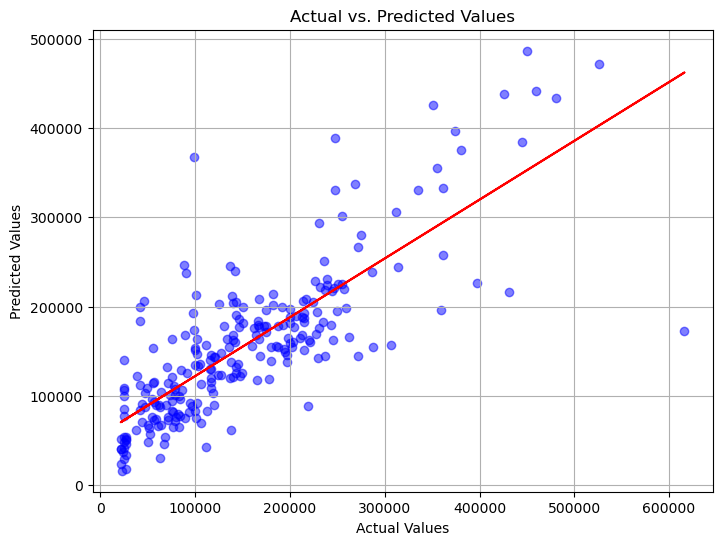

In [154]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Assuming you have the 'concatenated_data' dataframe

# Define your target variable (y) and features (X)
y2 = merged_data['Value']  # Assuming 'Value' is your target variable
X2 = merged_data[weather_columns]  # Using all weather columns as features

# Calculate Z-scores for the features
z_scores = np.abs(stats.zscore(X2))

# Set a threshold for Z-scores (e.g., 3)
threshold = 3

# Filter out rows with any feature having a Z-score greater than the threshold
filtered_indices = np.all(z_scores <= threshold, axis=1)
X2 = X2[filtered_indices]
y2 = y2[filtered_indices]

# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [4, 5, 6],
    'n_estimators': [269, 270, 271]
}

# Initialize the XGBoost Regressor model
model2 = xgb.XGBRegressor()

# Perform Grid Search for hyperparameter tuning
grid_search = GridSearchCV(model2, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train2, y_train2)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Train the best model on the training data
best_model.fit(X_train2, y_train2)

# Make predictions on the test data
y_pred2 = best_model.predict(X_test2)

# Calculate the MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = calculate_mape(y_test2, y_pred2)

# Print the evaluation metrics
print("Best Hyperparameters:")
print(best_params)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R2): {r2_score(y_test2, y_pred2):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test2, y_pred2):.2f}")

# Scatter plot for actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test2, y_pred2, c='b', marker='o', alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.grid(True)

# Calculate the line of best fit (regression line)
fit = np.polyfit(y_test2, y_pred2, 1)
line = np.poly1d(fit)

# Plot the line of best fit in red
plt.plot(y_test2, line(y_test2), 'r')

plt.show()


In [ ]:
import pandas as pd
import xgboost as xgb
import numpy as np
from scipy import stats
import joblib

unseen_data = read
# Load your trained XGBoost model
best_model = joblib.load('xgboost_model.pkl')

# Load your unseen data into a DataFrame called 'unseen_data'

# Define the list of weather columns you used in training
weather_columns = ['temp', 'dew', 'humidity', 'precip', 'windspeed', 'cloudcover']

# Apply Z-score scaling to the unseen data
z_scores_unseen = np.abs(stats.zscore(unseen_data[weather_columns]))
unseen_data = unseen_data[(z_scores_unseen <= threshold).all(axis=1)]

# Make predictions on the processed unseen data
y_pred_unseen = best_model.predict(unseen_data[weather_columns])

# You can now use y_pred_unseen for further analysis or decision-making.


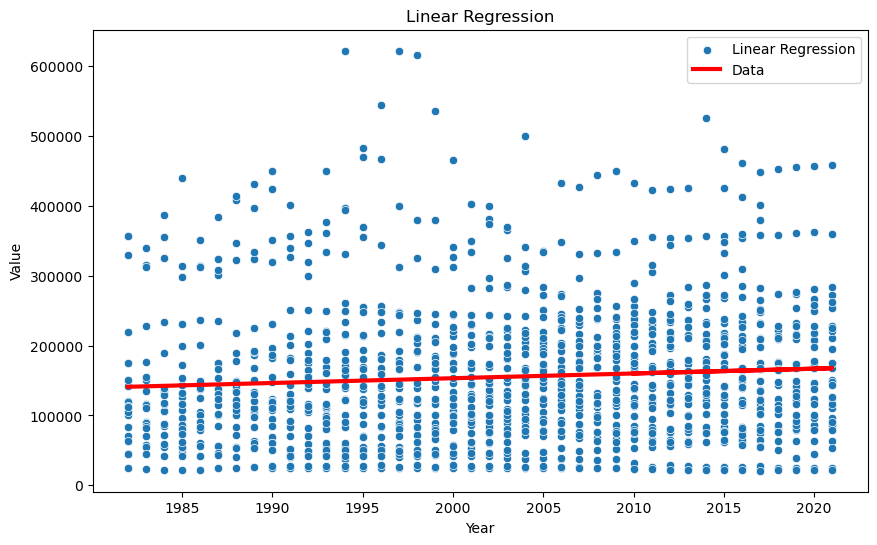

Mean Squared Error: 8671295882.167725
R-squared: -0.0032823838729867383


In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# We'll use 'Year' as the independent variable and 'Value' as the dependent variable

# Select the relevant columns
data = merged_data[['Year', 'Value']]

# Split the data into independent (X) and dependent (y) variables
X = data[['Year']]
y = data['Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Calculate model metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Visualize the data and the linear regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Value', data=data)
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.title('Linear Regression')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(['Linear Regression', 'Data'])
plt.show()

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


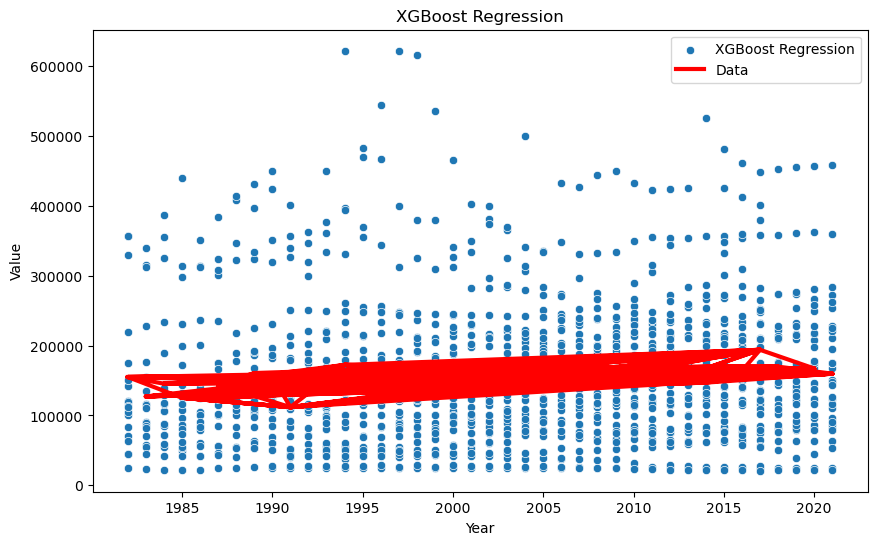

Mean Squared Error: 9518733221.126743
R-squared: -0.10133219847592678


In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# We'll use 'Year' as the independent variable and 'Value' as the dependent variable

# Select the relevant columns
data = merged_data[['Year', 'Value']]

# Split the data into independent (X) and dependent (y) variables
X = data[['Year']]
y = data['Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create an XGBoost regression model
model = XGBRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate model metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Visualize the data and the XGBoost regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Value', data=data)
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.title('XGBoost Regression')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(['XGBoost Regression', 'Data'])
plt.show()

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


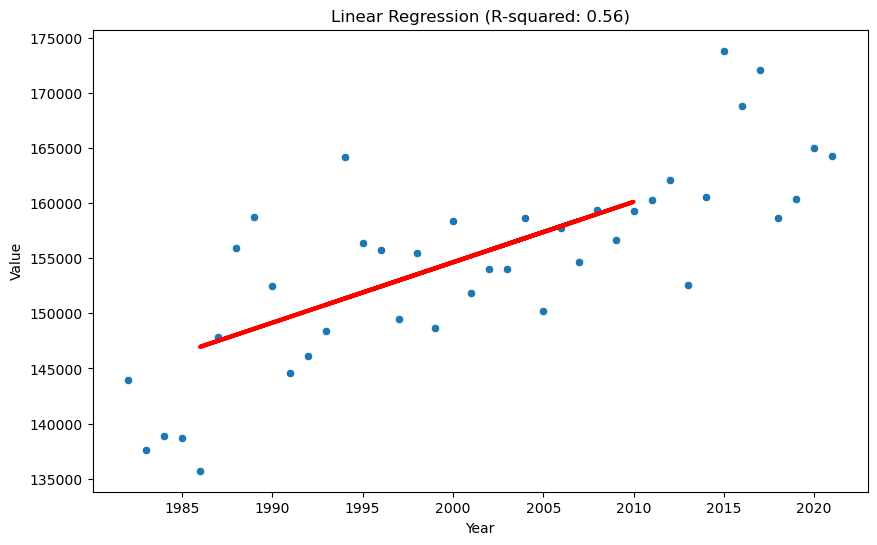

Mean Squared Error: 22824168.87
R-squared: 0.56


In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# We'll use 'Year' as the independent variable and 'Value' as the dependent variable

# Select the relevant columns
data = merged_data[['Year', 'Value']]

# Calculate the average 'Value' by year
yearly_average = data.groupby('Year')['Value'].mean().reset_index()

# Split the data into independent (X) and dependent (y) variables
X = yearly_average[['Year']]
y = yearly_average['Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate model metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Visualize the data and the Linear Regression line
plt.figure(figsize=(10, 6))

# Plot the Linear Regression line
plt.subplot(1, 1, 1)
sns.scatterplot(x='Year', y='Value', data=yearly_average)
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.title(f'Linear Regression (R-squared: {r2:.2f})')

plt.show()

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

R-squared: 0.61


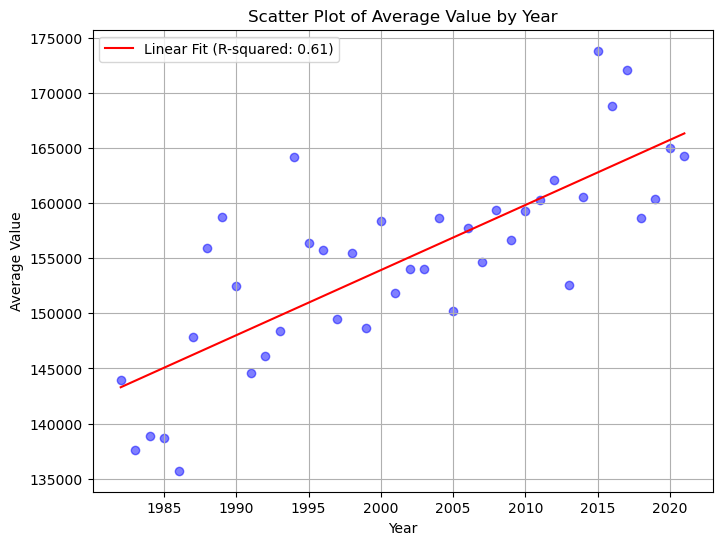

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Select the relevant columns
data = merged_data[['Year', 'Value']]

# Calculate the average 'Value' by year
yearly_average = data.groupby('Year')['Value'].mean().reset_index()

# Create a scatter plot of the data
plt.figure(figsize=(8, 6))
plt.scatter(yearly_average['Year'], yearly_average['Value'], color='blue', alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Scatter Plot of Average Value by Year')

# Add a line of best fit (linear regression line)
slope, intercept, r_value, p_value, std_err = linregress(yearly_average['Year'], yearly_average['Value'])
x_values = np.array(yearly_average['Year'])
y_values = intercept + slope * x_values
plt.plot(x_values, y_values, color='red', label=f'Linear Fit (R-squared: {r_value**2:.2f})')

plt.grid(True)
plt.legend()

# Calculate R-squared value and MSE
y_actual = yearly_average['Value']
y_predicted = intercept + slope * x_values
r_squared = r_value ** 2

print(f'R-squared: {r_squared:.2f}')

plt.show()
